In [2]:
####################################
# phrase.py                        #
#                                  #
# Defines Phrase class for genetic #
#                                  #
# Doug Lloyd                       #
# March 15, 2019                   #
# CS50                             #
####################################

import random
from matplotlib import pyplot

import numpy,math
from cs50 import get_string
import pandas as pd
import statistics
import talib
df1 = pd.read_csv("/root/alpha/git/mine/data_science/data/01JAN/SBIN.csv",header=None)
df = df1[4]
avg = statistics.mean(df)
# ask the user for a target string
# target = get_string("What target do you want to match? ")
target = 6
popSize = 100
c1 = 0

class Phrase:

    # constructor method
    def __init__(self):
        self.characters = []
        # append len(target) number of randomly chosen printable ASCII chars
        for i in range(target):
            character = chr(random.choice(range(48,50)))
            self.characters.append(character)
        self.r1_avg_p = statistics.mean(df)
        self.count0 = 0
            # else:
            #     self.characters.append('0')

    # render the character array as a string instead of an array of chars
    def getContents(self):
        return ''.join(self.characters)

    # score the current entity's fitness by counting matches to target
    def getFitness(self):
        self.score = 0
        self.shares = 0
        self.buy = 0
        self.buy_price = 0
        self.sell = 0
        self.sell_price = 0
        # self.r1_avg
        # sel
        # for i in range(len(self.characters)):
        for p in range(len(df)-20):
            j = p + 20
            self.count0 = 0
            self.r1(df[j])
            self.r2(j)
            self.rocp(j)
            # self.macd(j)
            if self.count0>(target/4):
                if self.buy == 1 and self.sell == 0:
                    self.buy = 0
                    self.score += (df[j] - self.buy_price)
                elif self.buy == 0 and self.buy == 0:
                    self.sell = 1
                    self.sell_price = df[j]
            else:#if self.characters[2] == '1':
                if self.sell == 1  and self.buy == 0:
                    self.sell = 0
                    self.score -= (df[j] - self.sell_price)
                elif self.sell == 0 and self.buy == 0:
                    self.buy = 1
                    self.buy_price = df[j]
        if self.sell == 1 and self.buy == 0:
            self.sell = 0
            self.score -= (df[j] - self.sell_price)
        elif self.buy == 1 and self.sell == 0:
            self.buy = 0
            self.score += (df[j] - self.buy_price)

            # print("sell:"+str(self.sell)+" buy:"+str(self.buy)+" sell_p: "+str(self.sell_price)+" buy_p: "+str(self.buy_price))
    # create a child of two members of the current generation
    def crossover(self, partner):

        # create a spot for the characters to go
        child = Phrase()

        # flip a coin for each character, selecting from one parent each time
        for i in range(len(self.characters)):
            # if i % 3 != 0:
            if random.random() < 0.5:
                child.characters[i] = self.characters[i]
            else:
                child.characters[i] = partner.characters[i]

        return child

    # some portion of the time, need some characters to randomly change
    def mutate(self):

        # less than 1% of the time, change a character into something else
        for i in range(len(self.characters)):
            # if i % 3 != 0:
            if random.random() < 0.02:
                self.characters[i] = chr(random.choice(range(48,50)))
    def r1(self,price):
        if price > self.r1_avg_p:
            if self.characters[1] == '0':
                self.count0 += 1
        elif price < self.r1_avg_p:
            if self.characters[0] == '0':
                self.count0 += 1

    def r2(self, j):
        if j > 0:
            avg = statistics.mean(df[0:j])
            if df[j] > avg :
                if self.characters[3] == '0':
                    self.count0 += 1
            elif df[j] < avg:
                if self.characters[2] == '0':
                    self.count0 += 1

    def rocp(self,j):
        # if(j > 0):
        rocp  = talib.ROCP((df[0:j]),timeperiod=19)
        if rocp[j-1] > 0:
            if self.characters[5] == '0':
                self.count0 += 1
        elif rocp[j-1]<0:
            if self.characters[4] == '0':
                self.count0 += 1

    def macd(self,j):
        # if (j > 0):
        # rocp = talib.MACD((df[0:j]), fastperiod=12,slowperiod=26, signalperiod=9)
        macd, signal, hist = talib.MACD((df[0:j]), fastperiod=12, slowperiod=26, signalperiod=9)
        norm_macd = numpy.nan_to_num(macd) / math.sqrt(numpy.var(numpy.nan_to_num(macd)))
        norm_signal = numpy.nan_to_num(signal) / math.sqrt(numpy.var(numpy.nan_to_num(signal)))
        norm_hist = numpy.nan_to_num(hist) / math.sqrt(numpy.var(numpy.nan_to_num(hist)))
        macdrocp = talib.ROCP(norm_macd + numpy.max(norm_macd) - numpy.min(norm_macd), timeperiod=1)
        signalrocp = talib.ROCP(norm_signal + numpy.max(norm_signal) - numpy.min(norm_signal), timeperiod=1)
        histrocp = talib.ROCP(norm_hist + numpy.max(norm_hist) - numpy.min(norm_hist), timeperiod=1)
        if rocp[j - 1] > 0:
            if self.characters[5] == '0':
                self.count0 += 1
        elif rocp[j - 1] < 0:
            if self.characters[4] == '0':
                self.count0 += 1



FileNotFoundError: [Errno 2] File b'/root/alpha/git/mine/data_science/data/01JAN/SBIN.csv' does not exist: b'/root/alpha/git/mine/data_science/data/01JAN/SBIN.csv'

In [6]:
macd, signal, hist = talib.MACD((df[0:34]), fastperiod=12, slowperiod=26, signalperiod=9)
signal

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33   -0.212513
dtype: float64

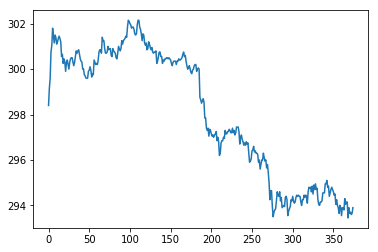

In [17]:
import random
from cs50 import get_string
import pandas as pd
import statistics
df1 = pd.read_csv("/root/alpha/git/mine/data_science/data/02JAN/SBIN.txt",sep=",", header=None)
dfc = pd.DataFrame(df1[[6, 7]])
dfc = dfc[1:376]
dfc = pd.DataFrame(dfc)
dfc.reset_index(inplace=True)
df = dfc[6]
dfv = dfc[7]
pyplot.plot(df)

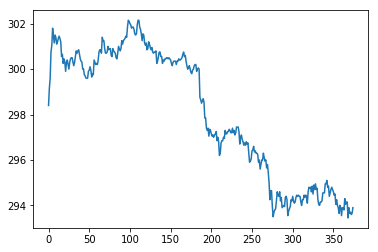

In [21]:
pyplot.plot(df)
# pyplot.plot((rsi/100)*7+294)
# # pyplot.plot((a/100)*7+294)
# pyplot.plot((rsi))
# pyplot.plot((a))
# pyplot.plot((b))
# pyplot.plot((c))
# pyplot.plot((d))

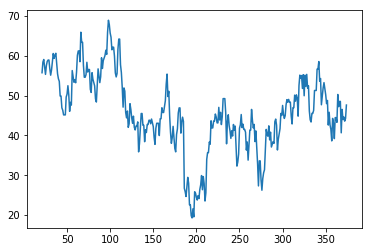

In [18]:
rsi = talib.RSI(df[1:], timeperiod=20)
rsi
pyplot.plot((rsi))
# pyplot.plot(a)
# pyplot.plot(b)
# # pyplot.plot((b))
# pyplot.plot((c))
# pyplot.plot((d))

In [62]:
b = []
for i in range(392):
    b.append((80/100)*7+294)
a = []
for i in range(392):
    a.append((70/100)*7+294)
c = []
for i in range(392):
    c.append((30/100)*7+294)
d = []
for i in range(392):
    d.append((40/100)*7+294)

In [34]:
df1 = pd.read_csv("/root/alpha/git/mine/data_science/data/01JAN/SBIN.csv",header=None)
df = df1[4]
df

0      297.50
1      296.30
2      296.35
3      296.35
4      295.65
5      295.60
6      295.90
7      295.70
8      295.60
9      295.80
10     295.40
11     295.55
12     295.40
13     295.20
14     295.55
15     295.75
16     295.75
17     295.50
18     295.60
19     295.00
20     295.15
21     295.05
22     295.40
23     295.40
24     295.60
25     295.40
26     295.35
27     295.45
28     295.35
29     295.35
        ...  
363    299.65
364    299.35
365    299.45
366    299.45
367    299.85
368    300.00
369    300.15
370    300.25
371    300.30
372    300.50
373    300.35
374    300.45
375    300.70
376    299.60
377    299.60
378    300.70
379    299.60
380    299.60
381    300.70
382    299.60
383    299.60
384    299.60
385    299.60
386    299.60
387    299.60
388    300.70
389    299.60
390    299.60
391    299.60
392    299.60
Name: 4, Length: 393, dtype: float64

In [7]:
def r2(j):
    if j > 0:
        avg = statistics.mean(df[j-20:j])
        if df[j] > avg :
            if self.characters[3] == '0':
                self.count0 += 1
        elif df[j] < avg:
            if self.characters[2] == '0':
                self.count0 += 1

In [55]:
dfc = pd.DataFrame(df1[[4,5]])
dfc = dfc[180:]
dfc = pd.DataFrame(dfc)
dfc.reset_index()
# dfc

,index,4,5
0,180,296.10,4720
1,181,296.00,10498
2,182,295.90,8264
3,183,295.90,5795
4,184,296.00,5528
5,185,296.00,5117
6,186,295.95,3052
7,187,296.00,10221
8,188,296.00,3896
9,189,296.05,3947
